In [19]:
from qiskit import QuantumCircuit
from qiskit.compiler import transpile
from qiskit.transpiler import PassManager

C:\ProgramData\Anaconda3\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
C:\ProgramData\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.GK7GX5KEQ4F6UYO3P26ULGBQYHGQO7J4.gfortran-win_amd64.dll
C:\ProgramData\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
  stacklevel=1)
C:\ProgramData\Anaconda3\lib\site-packages\qiskit\validation\fields\custom.py:76: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  numpy.integer, numpy.float,
C:\ProgramData\Anaconda3\lib\site-packages\qiskit\quantum_info\operators\pauli.py:111: DeprecationWarning: `np.bool` is a deprecat

In [20]:
# Transpilation Sample Code
from qiskit.transpiler import CouplingMap, Layout
from qiskit.transpiler.passes import BasicSwap, LookaheadSwap, StochasticSwap

In [4]:
# cost function
def circuit_cost(circuit):
    costs = {
        'cx': 1,
        'swap': 3,
        'h': 0,
        'u1': 0,
        'u2': 0,
        'u3': 0,
        'tdg': 0,
        't': 0
    }
    ops_count = circuit.count_ops()
    total_cost = 0
    for k, v in ops_count.items():
        total_cost += costs[k] * v
    return total_cost

In [41]:
from qiskit import QuantumCircuit

from random import randint, choice, sample


# 1. Random generate MCT circuits
def generate_random_mct_circuit(n_qubits=10, n_gates=20, control_qubits=[3]):
    qc = QuantumCircuit(n_qubits)
    for _ in range(n_gates):
        this_control_qubits = choice(control_qubits)
        qubit_indices = sample(list(range(n_qubits)), this_control_qubits*2-1)
        qc.mcx(qubit_indices[:this_control_qubits], qubit_indices[-1], ancilla_qubits=qubit_indices[this_control_qubits:-1], mode='v-chain')
    return qc

In [93]:
rand_circuit1 = generate_random_mct_circuit(n_qubits=53, n_gates=3, control_qubits=[3])
rand_circuit1.draw()

q_0: ──────────────────
                        
 q_1: ──────────────────
                        
 q_2: ──────────────────
                        
 q_3: ──────────────────
                        
 q_4: ──■───────────■───
        │           │   
 q_5: ──┼───────────┼───
        │           │   
 q_6: ──┼───────────┼───
        │           │   
 q_7: ──┼───────────┼───
        │           │   
 q_8: ──┼───────────┼───
        │           │   
 q_9: ──┼───────────┼───
        │           │   
q_10: ──■───────────┼───
        │           │   
q_11: ──┼───────────┼───
        │         ┌─┴──┐
q_12: ──┼─────────┤0   ├
        │         │    │
q_13: ──┼─────────┤    ├
        │         │    │
q_14: ──┼─────────┤    ├
        │         │    │
q_15: ──┼─────────┤    ├
        │         │  X │
q_16: ──┼─────■───┤    ├
        │     │   │    │
q_17: ──┼─────■───┤    ├
        │   ┌─┴──┐│    │
q_18: ──┼───┤0   ├┤    ├
        │   │    ││    │
q_19: ──┼───┤    ├┤1   ├
        │   │    │└─┬──┘
q_20: ──┼───┤    ├──┼───
        │   │    │  │   
q_21: ──┼───┤    ├──┼───
        │   │    │  │   
q_22: ──┼───┤    ├──┼───
        │   │    │  │   
q_23: ──┼───■    ├──┼───
        │   │    │  │   
q_24: ──┼───┤    ├──┼───
        │   │    │  │   
q_25: ──┼───┤  X ├──┼───
        │   │    │  │   
q_26: ──┼───┤    ├──■───
        │   │    │  │   
q_27: ──┼───┤    ├──┼───
        │   │    │  │   
q_28: ──┼───┤    ├──┼───
        │   │    │  │   
q_29: ──┼───┤    ├──┼───
        │   │    │  │   
q_30: ──┼───┤    ├──┼───
        │   │    │  │   
q_31: ──┼───┤    ├──┼───
        │   │    │  │   
q_32: ──┼───┤1   ├──┼───
      ┌─┴──┐└────┘  │   
q_33: ┤0   ├────────┼───
      │    │        │   
q_34: ┤    ├────────┼───
      │    │        │   
q_35: ┤    ├────────┼───
      │    │        │   
q_36: ┤    ├────────┼───
      │    │        │   
q_37: ┤    ├────────┼───
      │    │        │   
q_38: ┤    ├────────┼───
      │    │        │   
q_39: ┤    ├────────┼───
      │    │        │   
q_40: ┤  X ├────────┼───
      │    │        │   
q_41: ┤    ├────────┼───
      │    │        │   
q_42: ■    ├────────┼───
      │    │        │   
q_43: ┤    ├────────┼───
      │    │        │   
q_44: ┤    ├────────■───
      │    │            
q_45: ┤    ├────────────
      │    │            
q_46: ┤    ├────────────
      │    │            
q_47: ┤1   ├────────────
      └────┘            
q_48: ──────────────────
                        
q_49: ──────────────────
                        
q_50: ──────────────────
                        
q_51: ──────────────────
                        
q_52: ──────────────────
                        
q_53: ──────────────────

In [34]:
# Architectures
INDEX_CONNECTION_LIST = {"Ourense": [(0, 1), (1, 2), (1, 3), (3, 4)],
                       "54QBT": [(0, 6), (1, 6), (1, 7), (2, 7), (2, 8), (3, 8), (3, 9), (4, 9), (4, 10), (5, 10), (5, 11),
                                    (6, 12), (6, 13), (7, 13), (7, 14), (8, 14), (8, 15), (9, 15), (9, 16), (10, 16), (10, 17), (11, 17),
                                    (12, 18), (13, 18), (13, 19), (14, 19), (14, 20), (15, 20), (15, 21), (16, 21), (16, 22), (17, 22), (17, 23),
                                    (18, 24), (18, 25), (19, 25), (19, 26), (20, 26), (20, 27), (21, 27), (21, 28), (22, 28), (22, 29), (23, 29),
                                    (24, 30), (25, 30), (25, 31), (26, 31), (26, 32), (27, 32), (27, 33), (28, 33), (28, 34), (29, 34), (29, 35),
                                    (30, 36), (30, 37), (31, 37), (31, 38), (32, 38), (32, 39), (33, 39), (33, 40), (34, 40), (34, 41), (35, 41),
                                    (36, 42), (37, 42), (37, 43), (38, 43), (38, 44), (39, 44), (39, 45), (40, 45), (40, 46), (41, 46), (41, 47),
                                    (42, 48), (42, 49), (43, 49), (43, 50), (44, 50), (44, 51), (45, 51), (45, 52), (46, 52), (46, 53), (47, 53)],
                       "53QBT": [(0, 1), (1, 2), (2, 3), (3, 4),
                                     (0, 5), (4, 6), (5, 9), (6, 13),
                                     (7, 8), (8, 9), (9, 10), (10, 11), (11, 12), (12, 13), (13, 14), (14, 15),
                                     (7, 16), (11, 17), (15, 18), (16, 19), (17, 23), (18, 27),
                                     (19, 20), (20, 21), (21, 22), (22, 23), (23, 24), (24, 25), (25, 26), (26, 27),
                                     (21, 28), (25, 29), (28, 32), (29, 36),
                                     (30, 31), (31, 32), (32, 33), (33, 34), (34, 35), (35, 36), (36, 37), (37, 38),
                                     (30, 39), (34, 40), (38, 41), (39, 42), (40, 46), (41, 50),
                                     (42, 43), (43, 44), (44, 45), (45, 46), (46, 47), (47, 48), (48, 49), (49, 50),
                                     (44, 51), (48, 52)],
                       "20QBT": [(0, 1), (1, 2), (2, 3), (3, 4),
                                 (0, 5), (1, 6), (1, 7), (2, 6), (2, 7), (3, 8), (3, 9), (4, 8), (4, 9),
                                 (5, 6), (6, 7), (7, 8), (8, 9),
                                 (5, 10), (5, 11), (6, 10), (6, 11), (7, 12), (7, 13), (8, 12), (8, 13), (9, 14),
                                 (10, 11), (11, 12), (12, 13), (13, 14),
                                 (10, 15), (11, 16), (11, 17), (12, 16), (12, 17), (13, 18), (13, 19), (14, 18), (14, 19),
                                 (15, 16), (16, 17), (17, 18), (18, 19)],
                       "16QBT": [(0, 1), (1, 2), (2, 3), (3, 4), (4, 5), (5, 6), (6, 7),
                                   (0, 8), (3, 11), (4, 12), (7, 15),
                                   (8, 9), (9, 10), (10, 11), (11, 12), (12, 13), (13, 14), (14, 15)]
                       }

In [130]:
# Baseline
def qiskit_baselines(circuit, architecture=INDEX_CONNECTION_LIST['53QBT']):
    for i in range(10):
        circuit = circuit.decompose()
    results = {}
    
    coupling_map = CouplingMap(couplinglist=architecture)
    
    print('run basic')
    bs = BasicSwap(coupling_map=coupling_map)
    pass_manager = PassManager(bs)
    basic_circ = pass_manager.run(circuit)
    results['basic_swap'] = circuit_cost(basic_circ)
    
#     print('run lookahead')
#     ls = LookaheadSwap(coupling_map=coupling_map)
#     pass_manager = PassManager(ls)
#     lookahead_circ = pass_manager.run(circuit)
#     results['lookahead_swap'] = circuit_cost(lookahead_circ)

    print('run stochastic')
    ss = StochasticSwap(coupling_map=coupling_map)
    pass_manager = PassManager(ss)
    stochastic_circ = pass_manager.run(circuit)
    results['stochastic_swap'] = circuit_cost(stochastic_circ)
    
    return results

In [94]:
qiskit_baselines(rand_circuit1)

OrderedDict([('swap', 82), ('cx', 36), ('u1', 24), ('u2', 12), ('t', 12), ('tdg', 9), ('h', 6)])
OrderedDict([('swap', 37), ('cx', 36), ('u1', 24), ('u2', 12), ('t', 12), ('tdg', 9), ('h', 6)])
OrderedDict([('swap', 76), ('cx', 36), ('u1', 24), ('u2', 12), ('t', 12), ('tdg', 9), ('h', 6)])


{'basic_swap': 282, 'lookahead_swap': 147, 'stochastic_swap': 264}

In [108]:
print(rand_circuit1.data[0][1])

[Qubit(QuantumRegister(54, 'q'), 10), Qubit(QuantumRegister(54, 'q'), 4), Qubit(QuantumRegister(54, 'q'), 42), Qubit(QuantumRegister(54, 'q'), 33), Qubit(QuantumRegister(54, 'q'), 47)]


In [39]:
def all_pair_shortest_paths(adjacent_list):
    n = 0
    for u, v in adjacent_list:
        n = max(n, u)
        n = max(n, v)
    n += 1
    adjacent_matrix = [[-1] * n for k in range(n)]
    for i in range(n):
        adjacent_matrix[i][i] = 0
    for u, v in adjacent_list:
        adjacent_matrix[u][v] = adjacent_matrix[v][u] = 1
    
    for k in range(n):
        for i in range(n):
            for j in range(n):
                if adjacent_matrix[i][j] == -1:
                    adjacent_matrix[i][j] = 2147483647
                adjacent_matrix[i][j] = min(adjacent_matrix[i][j], adjacent_matrix[i][k] + adjacent_matrix[k][j])
                
    return adjacent_matrix
    

In [41]:
# Two Level Mapping
def two_level_mapping_cost(circuit, architecture):
    outside_cost = 0
    
    distances = all_pair_shortest_paths(architecture)
    
    indices = []
    
    for gate in circuit.data:
        for qubit in gate[1]:
            indices.append(qubit.index)
    for index in indices:
        outside_cost += distances[index][indices[0]]
        
    inside_cost = 20 * len(circuit.data)
    
    return outside_cost + inside_cost

In [37]:
two_level_mapping_cost(rand_circuit1, INDEX_CONNECTION_LIST['53QBT'])

NameError: name 'rand_circuit1' is not defined

In [136]:
def run_experiment(n_qubits, architecture):
    results = []
    for i in range(10):
        print('running', i)
        rand_circuit = generate_random_mct_circuit(n_qubits=n_qubits, n_gates=i*10+10, control_qubits=[3])
        result = qiskit_baselines(rand_circuit)
        result['two_level_mapping'] = two_level_mapping_cost(rand_circuit, INDEX_CONNECTION_LIST['53QBT'])
        results.append(result)
        print(result)
    return results

In [137]:
results = run_experiment(53, INDEX_CONNECTION_LIST['53QBT'])

running 0
run basic
run stochastic
10
{'basic_swap': 1257, 'stochastic_swap': 1254, 'two_level_mapping': 495}
running 1
run basic
run stochastic
10
{'basic_swap': 2538, 'stochastic_swap': 2463, 'two_level_mapping': 1068}
running 2
run basic
run stochastic
10
{'basic_swap': 3720, 'stochastic_swap': 3837, 'two_level_mapping': 1476}
running 3
run basic
run stochastic
10
{'basic_swap': 5430, 'stochastic_swap': 4857, 'two_level_mapping': 1920}
running 4
run basic
run stochastic
10
{'basic_swap': 6630, 'stochastic_swap': 6888, 'two_level_mapping': 2536}
running 5
run basic
run stochastic
10
{'basic_swap': 7869, 'stochastic_swap': 7362, 'two_level_mapping': 3539}
running 6
run basic
run stochastic
10
{'basic_swap': 9792, 'stochastic_swap': 9540, 'two_level_mapping': 3771}
running 7
run basic
run stochastic
10
{'basic_swap': 11061, 'stochastic_swap': 10710, 'two_level_mapping': 3991}
running 8
run basic
run stochastic
10
{'basic_swap': 12225, 'stochastic_swap': 11568, 'two_level_mapping': 5107

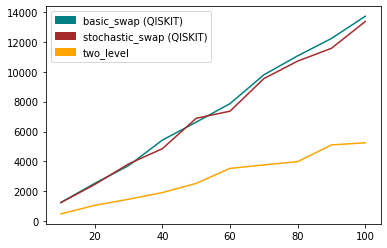

In [140]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

fig, ax = plt.subplots()

X = [10 * i for i in range(1, 11)]
basic_swap = []
stochastic_swap = []
two_level_mapping = []

for result in results:
    basic_swap.append(result['basic_swap'])
    stochastic_swap.append(result['stochastic_swap'])
    two_level_mapping.append(result['two_level_mapping'])

ax.plot(X, basic_swap, '-', color='teal')
ax.plot(X, stochastic_swap, '-', color='brown')
ax.plot(X, two_level_mapping, '-', color='orange')
teal_patch = mpatches.Patch(color='teal', label='basic_swap (QISKIT)')
brown_patch = mpatches.Patch(color='brown', label='stochastic_swap (QISKIT)')
orange_patch = mpatches.Patch(color='orange', label='two_level')
ax.legend(handles=[teal_patch, brown_patch, orange_patch])



In [22]:
def get_node_count(edge_list):
    n = 0
    for u, v in edge_list:
        n = max(n, u)
        n = max(n, v)
    n += 1
    return n

def is_isomorphic(edge_list1, edge_list2):
    n, m = get_node_count(edge_list1), get_node_count(edge_list2)
    if n != m: return False
    
    g1 = [[] for i in range(n)]
    g2 = [[] for i in range(n)]
    
    for u, v in edge_list1:
        g1[u].append(v)
        g1[v].append(u)
        
    for u, v in edge_list2:
        g2[u].append(v)
        g2[v].append(u)
        
    used = [False] * n
    mapping = [-1] * n
        
    def find_map(index):
        if index == n: return True
        for i in range(n):
            if not used[i] and len(g2[i]) == len(g1[index]):
                mapped_list = list(map(lambda x: mapping[x], g1[index]))
                processed_list = list(map(lambda x: x if used[x] else -1, g2[i]))
                
                if sorted(mapped_list) == sorted(processed_list):
                    used[i] = True
                    mapping[index] = i
                    if find_map(index + 1):
                        return True
                    used[i] = False
                    mapping[index] = -1
        return False

    result = find_map(0)
    
#     print(mapping)
    
    return result
                       
def is_color_isomorphic(colors1, colors2 ,edge_list):
    n = get_node_count(edge_list)
    
    g = [[] for i in range(n)]
    
    for u, v in edge_list:
        g[u].append(v)
        g[v].append(u)
        
    used = [False] * n
    mapping = [-1] * n
        
    def find_map(index):
        if index == n: return True
        for i in range(n):
            if not used[i] and len(g[i]) == len(g[index]) and colors1[index] == colors2[i]:
                mapped_list = list(map(lambda x: mapping[x], g[index]))
                processed_list = list(map(lambda x: x if used[x] else -1, g[i]))
                
                if sorted(mapped_list) == sorted(processed_list):
                    used[i] = True
                    mapping[index] = i
                    if find_map(index + 1):
                        return True
                    used[i] = False
                    mapping[index] = -1
        return False

    result = find_map(0)
    
    return result      
        

In [4]:
import itertools

def find_all_subgraphs(edge_list=INDEX_CONNECTION_LIST['53QBT'], n_qubits=4):
    perms = list(itertools.permutations(list(range(n_qubits))))
    
    n = get_node_count(edge_list)
    
    adjacent_matrix = [[-1] * n for k in range(n)]
    visited = [False] * n
    
    for i in range(n):
        adjacent_matrix[i][i] = 0
    for u, v in edge_list:
        adjacent_matrix[u][v] = adjacent_matrix[v][u] = 1

    subgraphs = []
    graph_hashes = set()
        
    def dfs(count, limit, node_list):
        if count == limit:
            edges = []
            for i, v in enumerate(node_list):
                for j, u in enumerate(node_list):
                    if j > i and adjacent_matrix[v][u] > 0:
                        edges.append((i, j))
            hashed_graph = str(edges)
            if hashed_graph not in graph_hashes:
                duplicated = False
                for subgraph in subgraphs:
                    if is_isomorphic(subgraph, edges):
                        duplicated = True
                        break
                if not duplicated:
                    graph_hashes.add(hashed_graph)
                    subgraphs.append(edges.copy())
            return
        for u in range(n):
            for v in node_list:
                if adjacent_matrix[v][u] > 0 and not visited[u]:
                    visited[u] = True
                    dfs(count + 1, limit, node_list + [u])
                    visited[v] = True
        return
    
    for i in range(n):
        visited[i] = True
        dfs(1, n_qubits, [i])
        visited[i] = False
    
#     print(subgraphs)
    return subgraphs
        

In [13]:
# chunks = find_all_subgraphs(edge_list=INDEX_CONNECTION_LIST['53QBT'], n_qubits=11)
# print(len(chunks))

KeyboardInterrupt: 

In [31]:
# Use 8-CNOT Toffoli to decompose
def generate_all_templates(architecture=INDEX_CONNECTION_LIST['53QBT'], control_qubits=3, mode='v-chain'):
    QBIT_TYPES = ['control', 'ancilla', 'output']
    
    total_qubits = 0
    if mode == 'v-chain':
        total_qubits = control_qubits * 2 - 1
    else:
        raise Error('fuck')

    subgraphs = find_all_subgraphs(architecture, total_qubits)
    
    def generate_color_schemes(colors, qbit_types):
        if colors[0] == 0 and colors[1] == 0 and colors[2] == 0:
            return [qbit_types]
        
        all_arangements = []
        
        for i in range(3):
            if colors[i] > 0:
                colors[i] -= 1
                all_arangements += generate_color_schemes(colors, qbit_types + [i])
                colors[i] += 1
        
        return all_arangements
        
    def calculate_template_cost(edge_list, qbit_types):
        return 0
    
    def dedupe_templates(color_schemes, subgraphs):
        unique_templates = []
        for subgraph in subgraphs:
            print(subgraph)
            unique_schemes = []
            for scheme in color_schemes:
                valid = True
                for unique_scheme in unique_schemes:
                    if is_color_isomorphic(scheme, unique_scheme, subgraph):
                        valid = False
                        break
                if valid:
                    unique_schemes.append(scheme)
                    unique_templates.append((scheme, subgraph))
        return unique_templates
        
    color_schemes = generate_color_schemes([control_qubits, control_qubits-2, 1], [])
    
    templates = dedupe_templates(color_schemes, subgraphs)
    
    return templates
    
#     for subgraph in subgraphs:
#         templates = generate_template_arrangements(subgraph, control_qubits, control_qubits-2, 1, [])
        

In [33]:
templates = generate_all_templates()

[(0, 1), (1, 2), (2, 3), (3, 4)]
[(0, 1), (1, 2), (1, 4), (2, 3)]


In [34]:
len(templates)

23

In [21]:
templates[0][0]

[0, 0, 0, 1, 2]

In [24]:
is_color_isomorphic([0, 0, 2, 1, 0], [0, 0, 2, 1, 0], templates[0][1])

True

In [40]:
import matplotlib.pyplot as plt
import networkx as nx

def draw_templates(templates):
    # https://coolors.co/ef476f-ffd166-06d6a0-118ab2-073b4c
    COLOR_CODES = ['#118ab2', '#06d6a0', '#ef476f']

    rows = (len(templates) - 1) / 7 + 1

    def gen_color_map(colors):
        return list(map(lambda x: COLOR_CODES[x], colors))

    index = 1

    plt.figure(figsize=(7*2.5, rows*2.5))

    for colors, edge_list in templates:
        G = nx.Graph()
        G.add_edges_from(edge_list)
        subax1 = plt.subplot(rows, 7, index)
        nx.draw(G, node_color=gen_color_map(colors), with_labels=True, font_weight='bold')
        index += 1

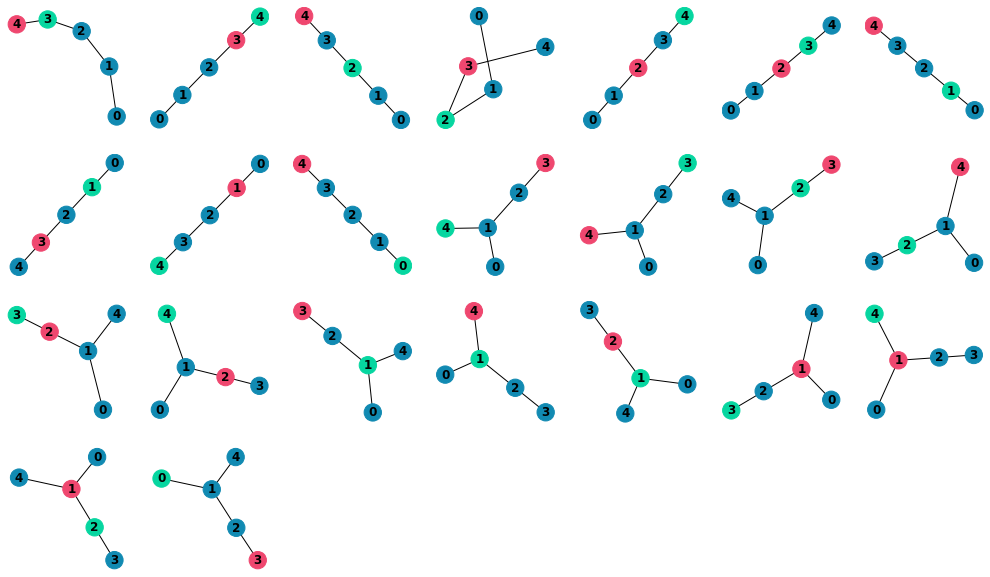

In [41]:
draw_templates(templates)

In [36]:
templates_54 = generate_all_templates(architecture=INDEX_CONNECTION_LIST['54QBT'])

[(0, 1), (1, 2), (2, 3), (3, 4)]
[(0, 1), (1, 2), (1, 4), (2, 3)]
[(0, 1), (1, 2), (1, 4), (2, 3), (3, 4)]
[(0, 1), (0, 2), (0, 3), (0, 4)]


In [38]:
len(templates_54)

39

In [52]:
templates_54[0]

([0, 0, 0, 1, 2], [(0, 1), (1, 2), (2, 3), (3, 4)])

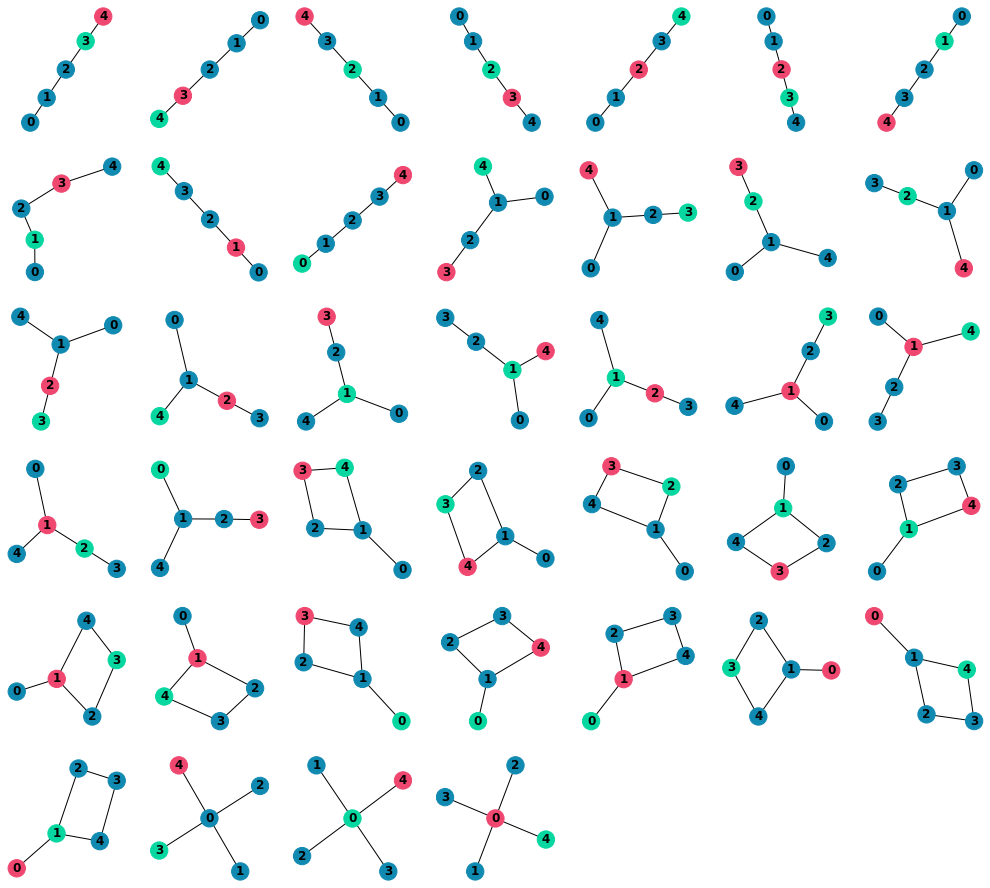

In [42]:
draw_templates(templates_54)

In [43]:
templates_4_53 = generate_all_templates(architecture=INDEX_CONNECTION_LIST['53QBT'], control_qubits=4)

[(0, 1), (0, 5), (1, 2), (2, 3), (3, 4), (4, 6)]
[(0, 1), (0, 2), (2, 3), (2, 6), (3, 4), (4, 5)]
[(0, 1), (0, 2), (2, 3), (3, 4), (4, 5), (4, 6)]


In [50]:
for control_qubits in range(6, 7):
    for architecture in ['16QBT', '20QBT', '53QBT', '54QBT']:
        templates = generate_all_templates(architecture=INDEX_CONNECTION_LIST[architecture], control_qubits=control_qubits)
        print(architecture, control_qubits, len(templates))

[(0, 1), (0, 8), (1, 2), (2, 3), (3, 4), (4, 5), (5, 6), (6, 7), (8, 9), (9, 10)]
[(0, 1), (0, 8), (1, 2), (2, 3), (3, 4), (3, 10), (4, 5), (5, 6), (6, 7), (8, 9)]
[(0, 1), (0, 8), (1, 2), (2, 3), (3, 4), (4, 5), (4, 10), (5, 6), (6, 7), (8, 9)]
16QBT 6 5780
[(0, 1), (0, 5), (1, 2), (1, 6), (1, 7), (2, 3), (2, 6), (2, 7), (3, 4), (3, 8), (3, 9), (4, 8), (4, 9), (5, 6), (5, 10), (6, 7), (6, 10), (7, 8), (8, 9)]
[(0, 1), (0, 5), (1, 2), (1, 6), (1, 7), (2, 3), (2, 6), (2, 7), (3, 4), (3, 8), (3, 9), (4, 8), (4, 9), (5, 6), (6, 7), (7, 8), (7, 10), (8, 9), (8, 10)]
[(0, 1), (0, 5), (1, 2), (1, 6), (1, 7), (2, 3), (2, 6), (2, 7), (3, 4), (3, 8), (3, 9), (4, 8), (4, 9), (5, 6), (6, 7), (7, 8), (8, 9), (9, 10)]
20QBT 6 2558
[(0, 1), (0, 5), (1, 2), (2, 3), (3, 4), (4, 6), (5, 7), (7, 8), (7, 10), (8, 9)]
[(0, 1), (0, 5), (1, 2), (2, 3), (3, 4), (4, 6), (5, 7), (6, 10), (7, 8), (8, 9)]
[(0, 1), (0, 2), (2, 3), (2, 4), (4, 5), (5, 6), (5, 10), (6, 7), (7, 8), (8, 9)]
[(0, 1), (0, 2), (2, 3), (

In [ ]:
def draw_routing():
    pass

def calculate_best_routing(template):
    colors, edge_list = template
    n_qubits = len(colors)
    
    control_qbits = [index for index, color in enumerate(colors) if color == 0]
    ancilla_qbits = [index for index, color in enumerate(colors) if color == 1]
    output_qbit = [index for index, color in enumerate(colors) if color == 2]
    
    circuit = QuantumCircuit(n_qubits)
    
    circuit.mcx(control_qbits, output_qbit[0], ancilla_qubits=ancilla_qbits, mode='v-chain')
    
    for i in range(10):
        circuit = circuit.decompose()
    
    coupling_map = CouplingMap(couplinglist=edge_list)
    
#     print('run basic')
    lookahead = LookaheadSwap(coupling_map=coupling_map)
    pass_manager = PassManager(lookahead)
    lookahead

In [66]:
def draw_routing():
    pass

def calculate_best_routing(template):
    colors, edge_list = template
    n_qubits = len(colors)
    
    control_qbits = [index for index, color in enumerate(colors) if color == 0]
    ancilla_qbits = [index for index, color in enumerate(colors) if color == 1]
    output_qbit = [index for index, color in enumerate(colors) if color == 2]
    
    circuit = QuantumCircuit(n_qubits)
    
    circuit.mcx(control_qbits, output_qbit[0], ancilla_qubits=ancilla_qbits, mode='v-chain')
    
    for i in range(10):
        circuit = circuit.decompose()
    
    coupling_map = CouplingMap(couplinglist=edge_list)
    
    lookahead = LookaheadSwap(coupling_map=coupling_map)
    pass_manager = PassManager(lookahead)
    lookahead_circuit = pass_manager.run(circuit)
    
    return circuit, lookahead_circuit


In [62]:
templates_54[0]

([0, 0, 0, 1, 2], [(0, 1), (1, 2), (2, 3), (3, 4)])

In [68]:
original_circuit, routed_circuit = calculate_best_routing(templates_54[0])

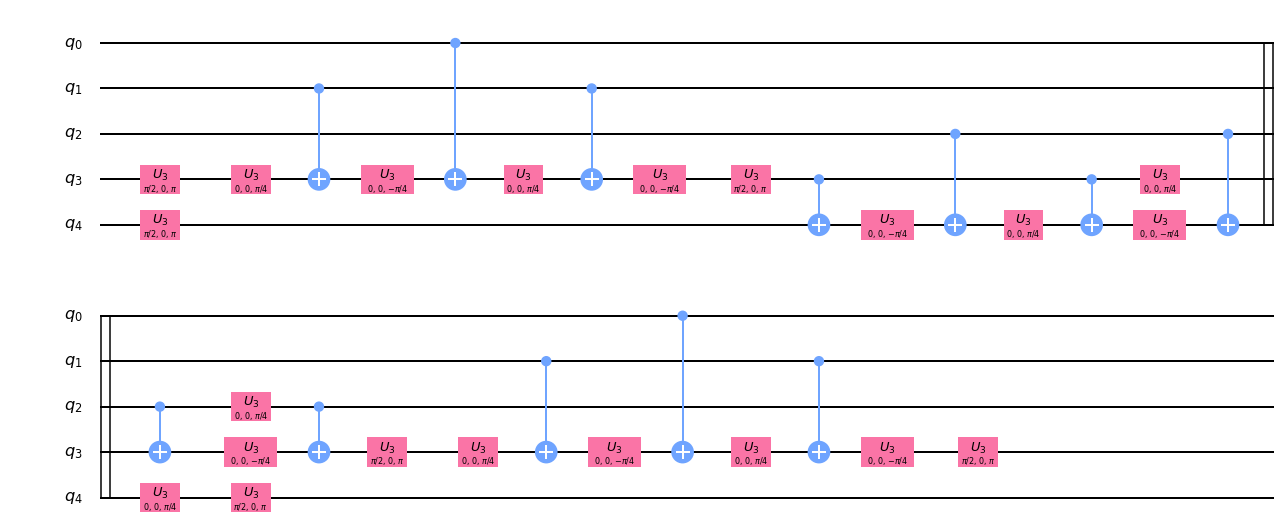

In [70]:
original_circuit.draw(output='mpl')

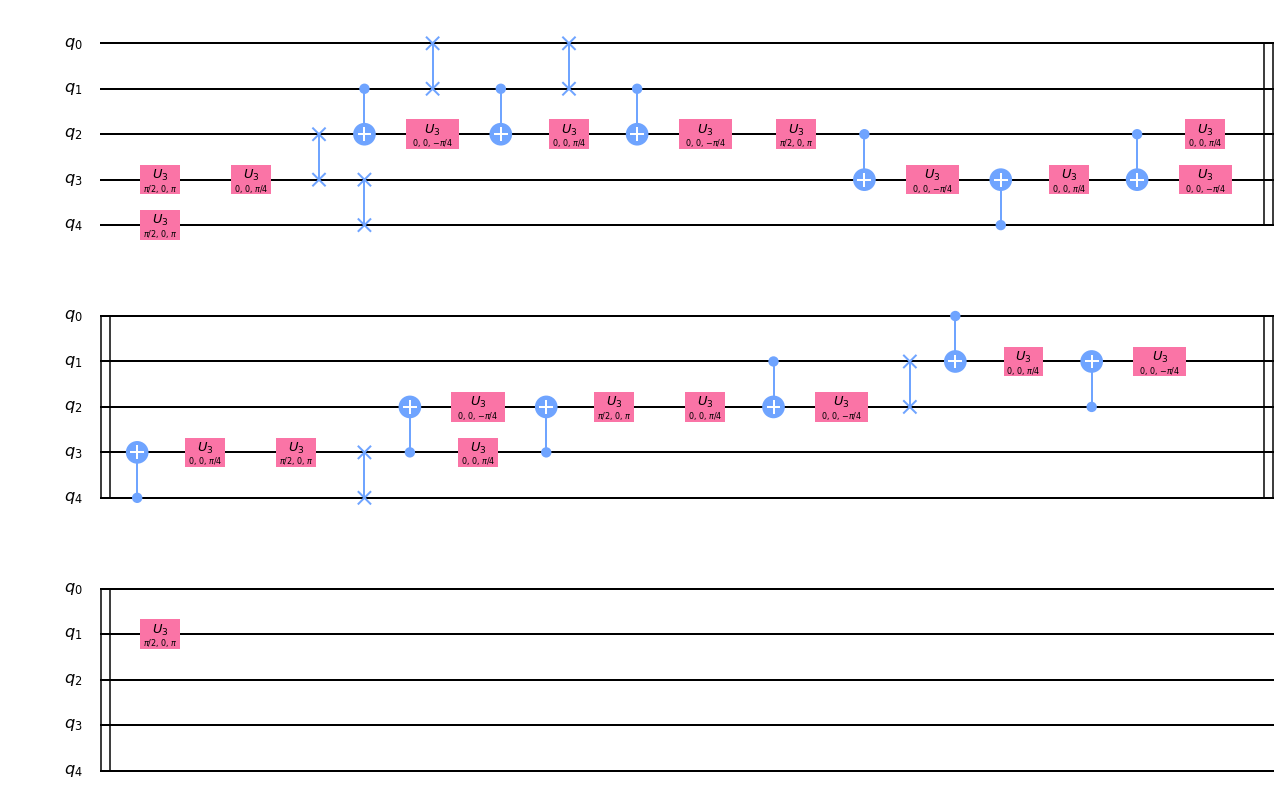

In [74]:
routed_circuit.draw(output='mpl')

In [73]:
routed_circuit.count_ops()['swap']

6

In [75]:
templates_with_costs_54 = list(map(lambda x: (x[0], x[1], calculate_best_routing(x)[1].count_ops()['swap']) , templates_54))

In [76]:
templates_with_costs_54

[([0, 0, 0, 1, 2], [(0, 1), (1, 2), (2, 3), (3, 4)], 6),
 ([0, 0, 0, 2, 1], [(0, 1), (1, 2), (2, 3), (3, 4)], 7),
 ([0, 0, 1, 0, 2], [(0, 1), (1, 2), (2, 3), (3, 4)], 5),
 ([0, 0, 1, 2, 0], [(0, 1), (1, 2), (2, 3), (3, 4)], 4),
 ([0, 0, 2, 0, 1], [(0, 1), (1, 2), (2, 3), (3, 4)], 6),
 ([0, 0, 2, 1, 0], [(0, 1), (1, 2), (2, 3), (3, 4)], 5),
 ([0, 1, 0, 0, 2], [(0, 1), (1, 2), (2, 3), (3, 4)], 4),
 ([0, 1, 0, 2, 0], [(0, 1), (1, 2), (2, 3), (3, 4)], 3),
 ([0, 2, 0, 0, 1], [(0, 1), (1, 2), (2, 3), (3, 4)], 10),
 ([1, 0, 0, 0, 2], [(0, 1), (1, 2), (2, 3), (3, 4)], 5),
 ([0, 0, 0, 1, 2], [(0, 1), (1, 2), (1, 4), (2, 3)], 4),
 ([0, 0, 0, 2, 1], [(0, 1), (1, 2), (1, 4), (2, 3)], 3),
 ([0, 0, 1, 0, 2], [(0, 1), (1, 2), (1, 4), (2, 3)], 3),
 ([0, 0, 1, 2, 0], [(0, 1), (1, 2), (1, 4), (2, 3)], 4),
 ([0, 0, 2, 0, 1], [(0, 1), (1, 2), (1, 4), (2, 3)], 2),
 ([0, 0, 2, 1, 0], [(0, 1), (1, 2), (1, 4), (2, 3)], 6),
 ([0, 1, 0, 0, 2], [(0, 1), (1, 2), (1, 4), (2, 3)], 4),
 ([0, 1, 0, 2, 0], [(0, 1), (1

In [25]:
BENCHMARK_FILES = ['cycle10_2',
                  'cycle17_3',
                  'ham15-70',
                  'ham15-109-214',
                  'ham15tc1',
                  'hwb50ps',
                  'hwb100ps',
                  'mod1024adder',
                  'mod1048576adder',
                  'symmetric_9-n10-gc73-qc61928',
                  'symmetric_9-n10-gc74-qc31819',
                  'symmetric_9-n10-gc347-qc1975']

In [31]:
import re

def parse_tfc(path):
    tfc_file = open(path, 'r')
    tfc_lines = tfc_file.readlines()
    
    add_gates = False
    
    variable_map = {}
    variable_count = 0
    
    def get_index_and_inv(variable):
        nonlocal variable_count
        
        token = ''
        inv = False
        if variable[-1] == '\'':
            token = variable[:-1]
            inv = True
        else:
            token = variable
        
        if token not in variable_map:
            variable_map[token] = variable_count
            variable_count += 1
            
        return variable_map[token], inv
    
    gates = []
    
    for line in tfc_lines:
        tokens = re.split('\s|,', line)
        if tokens[0].startswith('t') or tokens[0].startswith('T'):
            size = int(tokens[0][1:])
            
            qubits = []
            
            for token in tokens[1:1+size]:
                qubits.append(get_index_and_inv(token))
                
            gates.append(('toffoli', qubits))
            
        elif tokens[0].startswith('f'):
            size = int(tokens[0][1:])
            
            qubits = []
            
            for token in tokens[1:1+size]:
                qubits.append(get_index_and_inv(token))
                
            gates.append(('fredkin', qubits))
    
    if variable_count == 0: print(path)
    
    circuit = QuantumCircuit(variable_count)
    
    for gate_type, qubits in gates:
        inverted_qubits = []
        qubit_indices = []
        for qubit_index, inv in qubits:
            qubit_indices.append(qubit_index)
            if inv:
                circuit.x(qubit_index)
                inverted_qubits.append(qubit_index)
        
        if gate_type == 'toffoli':
            circuit.mcx(qubit_indices[1:], qubit_indices[0])
        elif gate_type == 'fredkin':
            circuit.cswap(qubit_indices[0], qubit_indices[1], qubit_indices[2])
            
        for qubit_index in inverted_qubits:
            circuit.x(qubit_index)
        
    return circuit

In [32]:
benchmark_circuits = []
for filename in BENCHMARK_FILES:
    benchmark_circuits.append((filename, parse_tfc('revlib/matsuo/' + filename + '.tfc')))

In [23]:
cycle10_2 = parse_tfc('revlib/matsuo/cycle10_2.tfc')

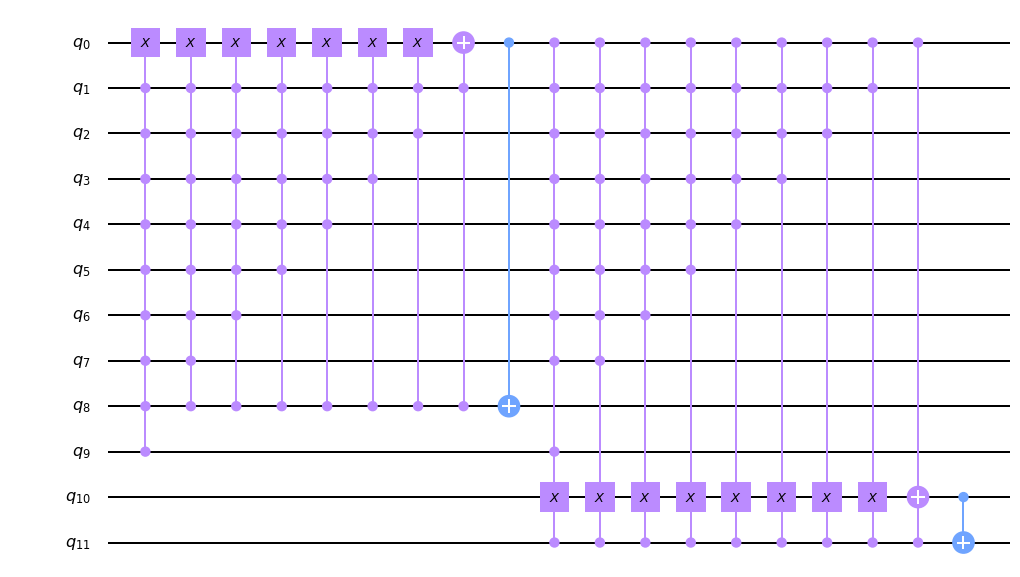

In [24]:
cycle10_2.draw(output='mpl')

In [33]:
benchmark_circuits

[('cycle10_2',
  <qiskit.circuit.quantumcircuit.QuantumCircuit at 0x1d03d5e12e8>),
 ('cycle17_3',
  <qiskit.circuit.quantumcircuit.QuantumCircuit at 0x1d03d5e10b8>),
 ('ham15-70', <qiskit.circuit.quantumcircuit.QuantumCircuit at 0x1d03d94bcc0>),
 ('ham15-109-214',
  <qiskit.circuit.quantumcircuit.QuantumCircuit at 0x1d03d951cf8>),
 ('ham15tc1', <qiskit.circuit.quantumcircuit.QuantumCircuit at 0x1d03d5e12b0>),
 ('hwb50ps', <qiskit.circuit.quantumcircuit.QuantumCircuit at 0x1d03d94bf98>),
 ('hwb100ps', <qiskit.circuit.quantumcircuit.QuantumCircuit at 0x1d03d5e1128>),
 ('mod1024adder',
  <qiskit.circuit.quantumcircuit.QuantumCircuit at 0x1d03d9e7fd0>),
 ('mod1048576adder',
  <qiskit.circuit.quantumcircuit.QuantumCircuit at 0x1d03d548a90>),
 ('symmetric_9-n10-gc73-qc61928',
  <qiskit.circuit.quantumcircuit.QuantumCircuit at 0x1d03d5480f0>),
 ('symmetric_9-n10-gc74-qc31819',
  <qiskit.circuit.quantumcircuit.QuantumCircuit at 0x1d03d4ceba8>),
 ('symmetric_9-n10-gc347-qc1975',
  <qiskit.circu

In [45]:
for filename, circuit in benchmark_circuits:
    print(filename)
    if filename.startswith('hwb'): continue
    cost = two_level_mapping_cost(circuit, INDEX_CONNECTION_LIST['53QBT'])
    print(filename, cost)

cycle10_2
cycle10_2 658
cycle17_3
cycle17_3 2499
ham15-70
ham15-70 1890
ham15-109-214
ham15-109-214 2875
ham15tc1
ham15tc1 4032
hwb50ps
hwb100ps
mod1024adder
mod1024adder 2346
mod1048576adder
mod1048576adder 17646
symmetric_9-n10-gc73-qc61928
symmetric_9-n10-gc73-qc61928 16715
symmetric_9-n10-gc74-qc31819
symmetric_9-n10-gc74-qc31819 15449
symmetric_9-n10-gc347-qc1975
symmetric_9-n10-gc347-qc1975 11856
